Name: Himanshu Tatawat
Roll Number: 12040660
References Used to Complete the Assignment
a.https://amsi.org.au/ESA_Senior_Years/SeniorTopic4/4h/4h_2content_11.html#:~:text=For%20a%2095%25%20confidence%20interval,%2C%20we%20use%20z%3D1.64.&text=Pr(%E2%88%92z%3CZ%3C,N(0%2C1).
b.https://medium.com/ymedialabs-innovation/data-augmentation-techniques-in-cnn-using-tensorflow-371ae43d5be9
c.https://analyticsindiamag.com/guide-to-tensorflow-keras-optimizers/

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing libraries

import numpy as np
from keras.preprocessing import image
import cv2 as cv
from google.colab.patches import cv2_imshow
from pathlib import Path
import os
from skimage import feature
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
import seaborn as sns
import PIL
from tensorflow import keras
# import tensorflow_addons as tfa
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

In [ ]:
import os

In [ ]:
import zipfile
def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
unzip_data('/content/drive/MyDrive/Colab Notebooks/Asg4_dataset.zip')

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/Colab Notebooks/Asg4_dataset.zip","r") as zip_ref:
    zip_ref.extractall("targetdir")

In [ ]:
print(os.listdir("targetdir"))

['Asg4_dataset']


In [ ]:
print(os.listdir("targetdir/Asg4_dataset"))

['1_6.zip', '1_2.zip', 'Sample_Format.csv', 'Readme.md', '1_4.zip', 'test.zip', '0_b.zip', '0_f.zip', '1_5.zip', '0_e.zip', '1_3.zip', '0_g.zip', '1_1.zip', '0_h.zip', '1_7.zip', '0_d.zip', '0_c.zip', 'test2.zip', '0_a.zip']


In [ ]:
def shape_tf(labels):
  for p,q in enumerate(labels):
    key = q.keys()
    for j in train_images[p]:
      print('length of class'+str(p)+' '+j,len(labels[p][j]))

In [ ]:
def load_data(container_path): # to load images files
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() ]
    categories = [fo.name for fo in folders]
    cat0 = [x for x in categories if x[0]=='0']
    cat1 = [x for x in categories if x[0]=='1']
    dit = [{},{}]
    train_locations = [{},{}]
    train_images = [[],[]]
    for x in cat0+cat1:
      unzip_data(container_path+'/'+x)
      directory = Path('/content/'+x[:3])
      sub = []
      unq = []
      files_path = []
      for file in directory.iterdir():
        # print(file)
        img = cv.imread(str(file))
        sub.append(img)
        files_path.append(str(file))
        shape_tf = img.shape
        if shape_tf not in unq:
          unq.append(shape_tf)
      
      if x[0] == "0":
        dit[0][x[2]] = sub
        train_locations[0][x[2]] = files_path
        train_images[0].append(x[2])
        print('Class 0 :'+str(x[2])+'\t',len(sub),'images and unique shapes\t', unq)
      else:
        dit[1][x[2]] = sub
        train_locations[1][x[2]] = files_path
        train_images[1].append(x[2])
        print('Class 1 :'+str(x[2])+'\t',len(sub),'images and unique shapes\t', unq)

    return dit, train_locations, train_images


In [ ]:
labels, train_locations, train_images = load_data('Asg4_dataset')

Class 0 :b	 2993 images and unique shapes	 [(50, 50, 3), (37, 50, 3)]
Class 0 :f	 4290 images and unique shapes	 [(50, 50, 3), (3, 50, 3)]
Class 0 :e	 4390 images and unique shapes	 [(50, 50, 3), (49, 50, 3), (50, 22, 3)]
Class 0 :g	 3407 images and unique shapes	 [(50, 50, 3), (7, 50, 3)]
Class 0 :h	 4356 images and unique shapes	 [(50, 50, 3), (50, 41, 3), (33, 50, 3)]
Class 0 :d	 3795 images and unique shapes	 [(50, 50, 3)]
Class 0 :c	 3338 images and unique shapes	 [(50, 50, 3), (50, 22, 3), (50, 32, 3), (8, 50, 3)]
Class 0 :a	 4066 images and unique shapes	 [(50, 50, 3)]
Class 1 :6	 4047 images and unique shapes	 [(50, 50, 3)]
Class 1 :2	 3695 images and unique shapes	 [(50, 50, 3)]
Class 1 :4	 3182 images and unique shapes	 [(50, 50, 3)]
Class 1 :5	 2913 images and unique shapes	 [(50, 50, 3), (49, 50, 3)]
Class 1 :3	 3821 images and unique shapes	 [(50, 50, 3)]
Class 1 :1	 3640 images and unique shapes	 [(50, 50, 3)]
Class 1 :7	 3555 images and unique shapes	 [(50, 50, 3)]


In [ ]:
train_images

[['b', 'f', 'e', 'g', 'h', 'd', 'c', 'a'], ['6', '2', '4', '5', '3', '1', '7']]

In [ ]:
labels[0].keys(), labels[1].keys()

(dict_keys(['b', 'f', 'e', 'g', 'h', 'd', 'c', 'a']),
 dict_keys(['6', '2', '4', '5', '3', '1', '7']))

In [ ]:
from matplotlib import pyplot as plt
import cv2

A. (50 marks) Prepare your dataset, augment the data by using translation, rotation by multiples of 90 degree and implement the following CNN for the task above.

In [ ]:
import matplotlib.image as mpimg

IMAGE_SIZE = 50
tf.compat.v1.disable_eager_execution()
tf.compat.v1.disable_v2_behavior()

def resize_data(data1):
    X_data = []
    tf.compat.v1.reset_default_graph()
    X = tf.compat.v1.placeholder(tf.float32, (None, None, 3))
    tf_img = tf.image.resize(X, (IMAGE_SIZE, IMAGE_SIZE), 
                                    tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        
        # Each image is resized individually as different image may be of different size.
        # file_path = data1
        for index, file_path in enumerate(data1):
            img = mpimg.imread(file_path)[:, :, :3] # Do not read alpha channel.
            resized_img = sess.run(tf_img, feed_dict = {X: img})
            X_data.append(resized_img)

    X_data = np.array(X_data, dtype = np.float32) # Convert to numpy
    print(len(X_data))
    return X_data

In [ ]:
for p,q in enumerate(train_images):
  for j in q:
    res = resize_data(train_locations[p][j])
    labels[p][j] = res

2993
4290
4390
3407
4356
3795
3338
4066
4047
3695
3182
2913
3821
3640
3555


In [ ]:
for p,q in enumerate(labels):
  key = q.keys()
  for j in train_images[p]:
    uni = []
    for k in labels[p][j]:
      sh = k.shape
      if sh not in uni:
        uni.append(sh)
    print('Different shapes in class'+str(p)+' '+j,uni)

unique shape in class0 g [(50, 50, 3)]
unique shape in class0 h [(50, 50, 3)]
unique shape in class0 b [(50, 50, 3)]
unique shape in class0 c [(50, 50, 3)]
unique shape in class0 f [(50, 50, 3)]
unique shape in class0 a [(50, 50, 3)]
unique shape in class0 e [(50, 50, 3)]
unique shape in class0 d [(50, 50, 3)]
unique shape in class1 7 [(50, 50, 3)]
unique shape in class1 5 [(50, 50, 3)]
unique shape in class1 2 [(50, 50, 3)]
unique shape in class1 6 [(50, 50, 3)]
unique shape in class1 4 [(50, 50, 3)]
unique shape in class1 3 [(50, 50, 3)]
unique shape in class1 1 [(50, 50, 3)]


In [ ]:
shape_tf(labels)

length of class0 g 3407
length of class0 h 4356
length of class0 b 2993
length of class0 c 3338
length of class0 f 4290
length of class0 a 4066
length of class0 e 4390
length of class0 d 3795
length of class1 7 3555
length of class1 5 2913
length of class1 2 3695
length of class1 6 4047
length of class1 4 3182
length of class1 3 3821
length of class1 1 3640


In [ ]:
def centralize(images_train, scales):
    # Various settings needed for Tensorflow operation
    boxes = np.zeros((len(scales), 4), dtype = np.float32)
    for index, scale in enumerate(scales):
        x1 = y1 = 0.5 - 0.5 * scale # To scale centrally
        x2 = y2 = 0.5 + 0.5 * scale
        boxes[index] = np.array([y1, x1, y2, x2], dtype = np.float32)
    box_ind = np.zeros((len(scales)), dtype = np.int32)
    crop_size = np.array([IMAGE_SIZE, IMAGE_SIZE], dtype = np.int32)
    
    X_scale_data = []
    tf.compat.v1.reset_default_graph()
    X = tf.compat.v1.placeholder(tf.float32, shape = (1, IMAGE_SIZE, IMAGE_SIZE, 3))
    # Define Tensorflow operation for all scales but only one base image at a time
    tf_img = tf.image.crop_and_resize(X, boxes, box_ind, crop_size)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        
        for img_data in images_train:
            batch_img = np.expand_dims(img_data, axis = 0)
            scaled_imgs = sess.run(tf_img, feed_dict = {X: batch_img})
            X_scale_data.extend(scaled_imgs)
    
    X_scale_data = np.array(X_scale_data, dtype = np.float32)
    return X_scale_data
	

In [ ]:
for p,q in enumerate(train_images):
  for j in q:
    # Produce each image at scaling of 90%, 75% and 60% of original image.
    scaled_imgs = centralize(labels[p][j], [0.90, 0.75, 0.60])
    labels[p][j] = scaled_imgs

In [ ]:
shape_tf(labels)

length of class0 g 10221
length of class0 h 13068
length of class0 b 8979
length of class0 c 10014
length of class0 f 12870
length of class0 a 12198
length of class0 e 13170
length of class0 d 11385
length of class1 7 10665
length of class1 5 8739
length of class1 2 11085
length of class1 6 12141
length of class1 4 9546
length of class1 3 11463
length of class1 1 10920


In [ ]:
from math import ceil, floor

def trans_params(index):
    if index == 0: # Translate left 20 percent
        offset = np.array([0.0, 0.2], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        w_start = 0
        w_end = int(ceil(0.8 * IMAGE_SIZE))
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 1: # Translate right 20 percent
        offset = np.array([0.0, -0.2], dtype = np.float32)
        size = np.array([IMAGE_SIZE, ceil(0.8 * IMAGE_SIZE)], dtype = np.int32)
        w_start = int(floor((1 - 0.8) * IMAGE_SIZE))
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = IMAGE_SIZE
    elif index == 2: # Translate top 20 percent
        offset = np.array([0.2, 0.0], dtype = np.float32)
        size = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = 0
        h_end = int(ceil(0.8 * IMAGE_SIZE)) 
    else: # Translate bottom 20 percent
        offset = np.array([-0.2, 0.0], dtype = np.float32)
        size = np.array([ceil(0.8 * IMAGE_SIZE), IMAGE_SIZE], dtype = np.int32)
        w_start = 0
        w_end = IMAGE_SIZE
        h_start = int(floor((1 - 0.8) * IMAGE_SIZE))
        h_end = IMAGE_SIZE 
        
    return offset, size, w_start, w_end, h_start, h_end

def translate_images(images_train):
    offsets = np.zeros((len(images_train), 2), dtype = np.float32)
    n_translations = 4
    X_translated_arr = []
    
    tf.compat.v1.reset_default_graph()
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        for q in range(n_translations):
            X_translated = np.zeros((len(images_train), IMAGE_SIZE, IMAGE_SIZE, 3), 
				    dtype = np.float32)
            X_translated.fill(1.0) # Filling background color
            base_offset, size, w_start, w_end, h_start, h_end = trans_params(q)
            offsets[:, :] = base_offset 
            glimpses = tf.image.extract_glimpse(images_train, size, offsets)
            
            glimpses = sess.run(glimpses)
            X_translated[:, h_start: h_start + size[0], \
			 w_start: w_start + size[1], :] = glimpses
            X_translated_arr.extend(X_translated)
    X_translated_arr = np.array(X_translated_arr, dtype = np.float32)
    return X_translated_arr

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
file_names1, file_names2, y_train, y_test = train_test_split(train_images, train_images, test_size=0.5)

In [ ]:
for p,q in enumerate(file_names1):
  for j in q:
    tr = translate_images(labels[p][j])
    labels[p][j] = tr

In [ ]:
!pip install fast-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_images

[['f', 'g', 'd', 'a', 'c', 'h', 'b', 'e'], ['3', '7', '4', '5', '1', '2', '6']]

In [ ]:
file_names1 = [['f', 'g', 'd'], ['3', '7', '4']]

Rotation (at multiple of 90 degrees):

In [ ]:
def images_rotate(images_train):
    X_rotate = []
    tf.compat.v1.reset_default_graph()
    X = tf.compat.v1.placeholder(tf.float32, shape = (IMAGE_SIZE, IMAGE_SIZE, 3))
    k = tf.compat.v1.placeholder(tf.int32)
    tf_img = tf.image.rot90(X, k = k)
    with tf.compat.v1.Session() as sess:
        sess.run(tf.compat.v1.global_variables_initializer())
        for img in images_train:
            for q in range(3):  # Rotation at 90, 180 and 270 degrees
                rotated_img = sess.run(tf_img, feed_dict = {X: img, k: q + 1})
                X_rotate.append(rotated_img)
        
    X_rotate = np.array(X_rotate, dtype = np.float32)
    print(len(X_rotate))
    return X_rotate

In [ ]:
images = [[],[]]

for p,q in enumerate(train_images):
  for j in q:
    for k in labels[p][j]:
      images[p].append(k)

In [ ]:
import numpy as np

In [ ]:
images = np.array(images)
np.save('images', images)

NameError: ignored

In [ ]:
np.savez_compressed('images.npz', images)

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/images.npz'

In [ ]:
dict_data = np.load(path, allow_pickle=True)
# extract the first array
data = dict_data['arr_0']

In [ ]:
images = data

In [ ]:
len(images[0])

In [ ]:
l = images[0]
l2 = images[1]

In [ ]:
images = l+l2
images = np.array(images)

In [ ]:
n = np.zeros(len(l))
p = np.ones(len(l2))

y = list(n)+list(p)
y = np.array(y)

In [ ]:
len(images)

55488

In [ ]:
images, images_test, y, y_test = train_test_split(images, y, test_size=0.33, random_state=42)

In [ ]:
len(images)

37176

In [ ]:
def plot_history(history, key):
  for i in history.history.keys():
    pd.DataFrame(history.history[i]).plot(figsize=(8, 5))
    plt.grid(True)
    plt.title(i)
    
    plt.show()
# Plot the history

In [ ]:
adam_custom = tf.keras.optimizers.Adamax(learning_rate=0.001, 
                                   beta_1=0.9, 
                                   beta_2=0.999, 
                                   epsilon=1e-07,
                                   name='Adamax')

In [ ]:
# Creating model using the Sequential in tensorflow

def build_model_using_sequential(x_train_scaled,y_train):
  learning_rate = 0.025
  epp = 100
  batch_s = 128

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    Dropout(0.2),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  
  model.compile(optimizer=SGD(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s
                      # callbacks=[callback]
                      )
  
  return model,history


Train on 29740 samples, validate on 7436 samples
Epoch 1/100
29740/29740 [==============================] - 12s 397us/sample - loss: 0.6675 - acc: 0.5858 - val_loss: 0.6223 - val_acc: 0.6836
Epoch 2/100
29740/29740 [==============================] - 3s 100us/sample - loss: 0.6220 - acc: 0.6633 - val_loss: 0.8223 - val_acc: 0.4402
Epoch 3/100
29740/29740 [==============================] - 3s 101us/sample - loss: 0.5838 - acc: 0.7042 - val_loss: 0.5612 - val_acc: 0.7218
Epoch 4/100
29740/29740 [==============================] - 3s 100us/sample - loss: 0.5627 - acc: 0.7206 - val_loss: 0.5749 - val_acc: 0.6981
Epoch 5/100
29740/29740 [==============================] - 3s 100us/sample - loss: 0.5470 - acc: 0.7353 - val_loss: 0.5052 - val_acc: 0.7645
Epoch 6/100
29740/29740 [==============================] - 3s 102us/sample - loss: 0.5342 - acc: 0.7409 - val_loss: 0.5322 - val_acc: 0.7261
Epoch 7/100
29740/29740 [==============================] - 3s 102us/sample - loss: 0.5338 - acc: 0.7437 

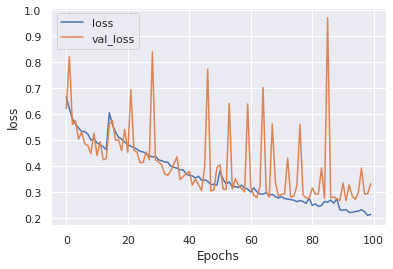

In [ ]:
# build the model
# epc = 0.01

model_seq,history_seq = build_model_using_sequential(images, y)
plot_history(history_seq, 'loss')

In [ ]:
test_loss, test_acc = model_seq.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.85545


Train on 29740 samples, validate on 7436 samples
Epoch 1/100
29740/29740 [==============================] - 3s 104us/sample - loss: 0.6672 - acc: 0.5891 - val_loss: 0.7275 - val_acc: 0.4513
Epoch 2/100
29740/29740 [==============================] - 3s 102us/sample - loss: 0.6329 - acc: 0.6522 - val_loss: 0.7387 - val_acc: 0.5643
Epoch 3/100
29740/29740 [==============================] - 3s 101us/sample - loss: 0.5835 - acc: 0.7036 - val_loss: 0.5492 - val_acc: 0.7353
Epoch 4/100
29740/29740 [==============================] - 3s 101us/sample - loss: 0.5576 - acc: 0.7250 - val_loss: 0.5318 - val_acc: 0.7527
Epoch 5/100
29740/29740 [==============================] - 3s 101us/sample - loss: 0.5401 - acc: 0.7416 - val_loss: 0.5360 - val_acc: 0.7394
Epoch 6/100
29740/29740 [==============================] - 3s 102us/sample - loss: 0.5325 - acc: 0.7480 - val_loss: 0.5647 - val_acc: 0.7097
Epoch 7/100
29740/29740 [==============================] - 3s 104us/sample - loss: 0.5712 - acc: 0.7055 -

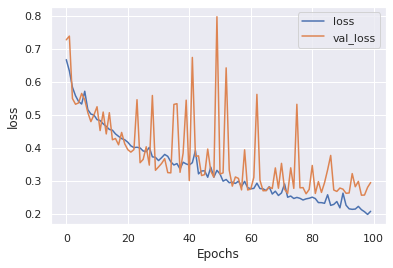

In [ ]:
# build the model
# epc = 0.025

final_model,history_seqq = build_model_using_sequential(images, y)
plot_history(history_seqq, 'loss')

In [ ]:
test_loss, test_acc = final_model.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.8777304


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             multiple                  448       
                                                                 
 max_pooling2d (MaxPooling2D  multiple                 0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           multiple                  18560     
                                                                 
 max_pooling2d_1 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 flatten (Flatten)           multiple                  0         
                                                                 
 dense (Dense)               multiple                  2

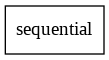

In [ ]:
from keras.utils.vis_utils import plot_model

# summarize model
model_seq.summary()
# plot model architecture
plot_model(model_seq, show_shapes=True, to_file='naive_inception_module.png')

In [ ]:
def output(pred):
  y_hat = []
  for q in pred:
    p = np.where(q==max(q))
    y_hat.append(p[0][0])

  y_hat = np.array(y_hat)
  return y_hat

In [ ]:
pred = final_model.predict(images_test)
y_hat = output(pred)

In [ ]:
res = list(y_hat == y_test)
(res.count(1)/len(y_test))

0.8777304499781564

In [ ]:
y

array([1., 0., 0., ..., 1., 0., 0.])

In [ ]:
def auc_roc(model):
  pred = model.predict(images_test)
  pred = output(pred)
  train_categories = ["Negative", "Positive"]

  labels = np.arange(2)

  clf_report = classification_report(y_test,
                                     pred,
                                     labels=labels,
                                     target_names=train_categories,
                                     output_dict=True)

  # .iloc[:-1, :] to exclude support
  sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

  y_score = model.predict(images_test)

  again_test_label = []
  for q in range(len(images_test)):
    arr = np.zeros(2)
    arr[int(y_test[q])] = 1
    again_test_label.append(list(arr))

  again_test_label = np.array(again_test_label)

  # plotting a line plot after changing it's width and height
  f = plt.figure()

  f.set_figwidth(10)
  f.set_figheight(10)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  lw=2

  for q in range(2):
      fpr[q], tpr[q], _ = roc_curve(again_test_label[:,q], y_score[:, q])
      roc_auc[q] = auc(fpr[q], tpr[q])

  colors = cycle(['b', 'r'])
  for q, color in zip(range(2), colors):
      plt.plot(fpr[q], tpr[q], color=color, lw=2, label='ROC curve of class {0} (area = {1:0.2f})'
               ''.format(train_categories[q], roc_auc[q]))


  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
final_model.save('final_model.a4')
print('Saved model successfully')

Model Saved!


In [ ]:
# load model
final_model = load_model('final_model.a4')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


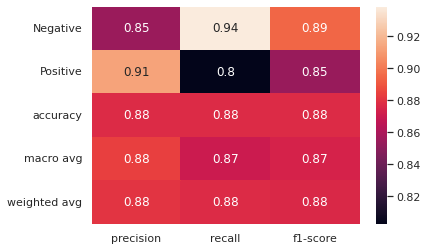

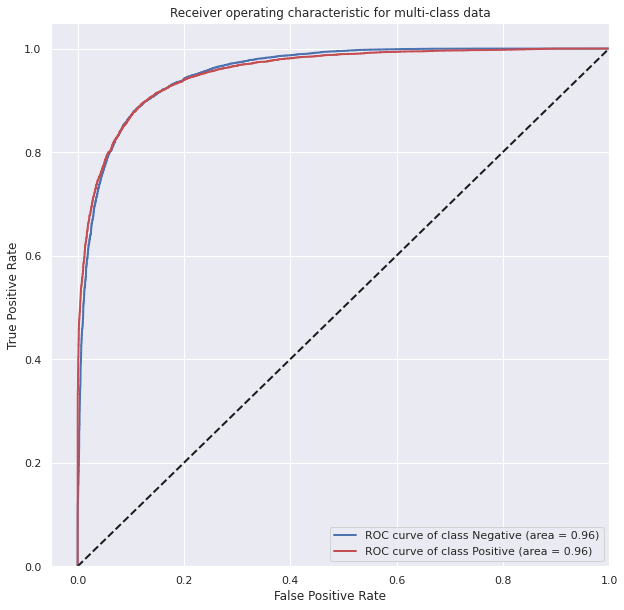

In [ ]:
auc_roc(final_model)

B. (25 marks) Evaluate the performance after addition of 2 layers of Inception Modules and a Max Pool to the above neural network after S4.
Hint: Follow GoogLeNet architecture in the book.

In [ ]:
# Creating model using the Sequential in tensorflow
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
# from keras.utils.vutils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

def build_model_using_inception(x_train_scaled,y_train):
  learning_rate = 0.01
  epp = 100
  batch_s = 128

  # define model input
  visible = Input(shape=(11, 11, 128))
  # add inception module
  layer = naive_inception_module(visible, 64, 128, 32)
  # model2 = Model(visible, outputs=layer)

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    Model(visible, outputs=layer),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    Dropout(0.2),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  
  model.compile(optimizer=SGD(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s
                      # callbacks=[callback]
                      )
  
  return model,history


Train on 29740 samples, validate on 7436 samples
Epoch 1/100
29740/29740 [==============================] - 5s 185us/sample - loss: 0.6815 - acc: 0.5305 - val_loss: 0.6848 - val_acc: 0.6506
Epoch 2/100
29740/29740 [==============================] - 5s 157us/sample - loss: 0.6672 - acc: 0.5692 - val_loss: 0.6461 - val_acc: 0.6586
Epoch 3/100
29740/29740 [==============================] - 5s 157us/sample - loss: 0.6557 - acc: 0.6065 - val_loss: 0.6931 - val_acc: 0.5098
Epoch 4/100
29740/29740 [==============================] - 5s 158us/sample - loss: 0.6463 - acc: 0.6182 - val_loss: 0.6745 - val_acc: 0.5878
Epoch 5/100
29740/29740 [==============================] - 5s 158us/sample - loss: 0.6353 - acc: 0.6491 - val_loss: 0.6019 - val_acc: 0.6872
Epoch 6/100
29740/29740 [==============================] - 5s 157us/sample - loss: 0.6275 - acc: 0.6684 - val_loss: 0.5903 - val_acc: 0.7097
Epoch 7/100
29740/29740 [==============================] - 5s 159us/sample - loss: 0.6051 - acc: 0.6895 -

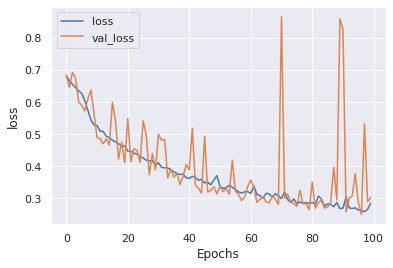

In [ ]:
# build the model
model,history2 = build_model_using_inception(images, y)
plot_history(history2, 'loss')

Train on 29740 samples, validate on 7436 samples
Epoch 1/100
29740/29740 [==============================] - 5s 181us/sample - loss: 0.6893 - acc: 0.5483 - val_loss: 0.6856 - val_acc: 0.5625
Epoch 2/100
29740/29740 [==============================] - 5s 154us/sample - loss: 0.6885 - acc: 0.5485 - val_loss: 0.6862 - val_acc: 0.5625
Epoch 3/100
29740/29740 [==============================] - 5s 155us/sample - loss: 0.6885 - acc: 0.5485 - val_loss: 0.6861 - val_acc: 0.5625
Epoch 4/100
29740/29740 [==============================] - 5s 157us/sample - loss: 0.6828 - acc: 0.5547 - val_loss: 0.6870 - val_acc: 0.5625
Epoch 5/100
29740/29740 [==============================] - 5s 156us/sample - loss: 0.6513 - acc: 0.6283 - val_loss: 0.6491 - val_acc: 0.6334
Epoch 6/100
29740/29740 [==============================] - 5s 155us/sample - loss: 0.6204 - acc: 0.6737 - val_loss: 0.6323 - val_acc: 0.6378
Epoch 7/100
29740/29740 [==============================] - 5s 156us/sample - loss: 0.5694 - acc: 0.7115 -

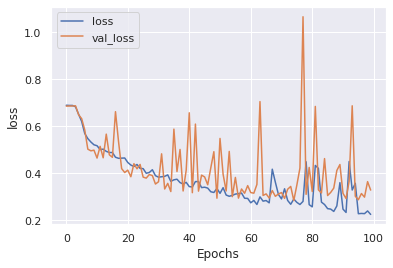

In [ ]:
# build the model
# epc = 0.025

model_inc,history_inc = build_model_using_inception(images, y)
plot_history(history_inc, 'loss')

In [ ]:
test_loss, test_acc = model_inc.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.8817169


In [ ]:
# summarize model
model_inc.summary()
# plot model architecture
# plot_model(model_inc, show_shapes=True, to_file='naive_inception_module.png')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          multiple                  448       
                                                                 
 max_pooling2d_8 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          multiple                  18560     
                                                                 
 max_pooling2d_9 (MaxPooling  multiple                 0         
 2D)                                                             
                                                                 
 model_1 (Functional)        (None, 11, 11, 352)       258272    
                                                                 
 flatten_3 (Flatten)         multiple                 

In [ ]:
model_inc.save('model_inc.a4')
print('Saved model successfully')

Model Saved!


In [ ]:
# load model
model_inc = load_model('model_inc.a4')

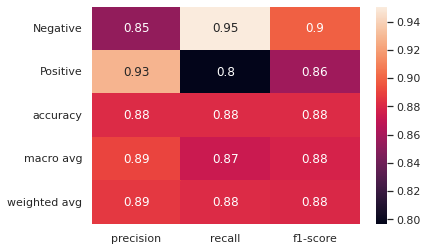

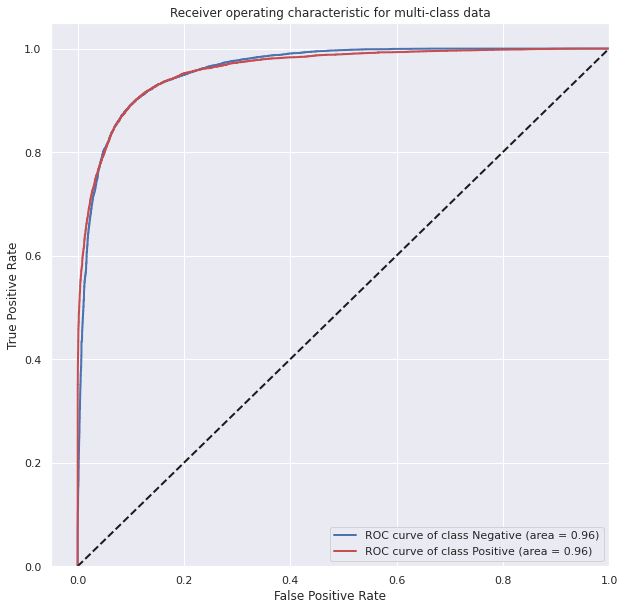

In [ ]:
auc_roc(model_inc)

C. (25 marks) Create a baseline Neural network using Transfer learning with Resnet-50 (pre-trained model). Compare with the networks A and B above. What do you learn from this?

In [ ]:
pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(50,50,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

Instructions for updating:
Colocations handled automatically by placer.


94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
# Creating model using the Sequential in tensorflow
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
# from keras.utils.vutils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

def build_model_using_trans(x_train_scaled,y_train):
  learning_rate = .001
  epp = 30
  batch_s = 128

  # define model input
  # visible = Input(shape=(11, 11, 128))
  # add inception module
  # layer = naive_inception_module(visible, 64, 128, 32)
  # model2 = Model(visible, outputs=layer)

  model = keras.Sequential()

  model.add(pretrained_model)
  # model.add(layers.Conv2D(16, (3,3), padding='same', activation='relu'))
  # model.add(layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'))
  # model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
  # model.add(layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'))
  # model.add(layer)
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(16, activation='relu'),)
  model.add(keras.layers.Dense(2, activation=tf.nn.softmax))

  # Compile the Model
  
  model.compile(optimizer=SGD(learning_rate=learning_rate),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s
                      # callbacks=[callback]
                      )
  
  return model,history


In [ ]:
# build the model
# epc/1000

model,history2 = build_model_using_trans(images, y)
plot_history(history2, 'loss')

Train on 29740 samples, validate on 7436 samples
Epoch 1/30
29740/29740 [==============================] - 15s 503us/sample - loss: 0.8082 - acc: 0.6312 - val_loss: 0.7244 - val_acc: 0.4375
Epoch 2/30
23552/29740 [======================>.......] - ETA: 2s - loss: 0.6034 - acc: 0.6995

In [ ]:
test_loss, test_acc = model.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Train on 29740 samples, validate on 7436 samples
Epoch 1/100
29740/29740 [==============================] - 5s 165us/sample - loss: 0.6811 - acc: 0.5507 - val_loss: 0.6590 - val_acc: 0.5620
Epoch 2/100
29740/29740 [==============================] - 5s 152us/sample - loss: 0.6537 - acc: 0.6217 - val_loss: 0.6332 - val_acc: 0.6779
Epoch 3/100
29740/29740 [==============================] - 5s 153us/sample - loss: 0.6251 - acc: 0.6680 - val_loss: 0.6059 - val_acc: 0.7146
Epoch 4/100
29740/29740 [==============================] - 5s 152us/sample - loss: 0.5764 - acc: 0.7123 - val_loss: 0.6007 - val_acc: 0.6844
Epoch 5/100
29740/29740 [==============================] - 5s 152us/sample - loss: 0.5491 - acc: 0.7316 - val_loss: 0.6459 - val_acc: 0.6545
Epoch 6/100
29740/29740 [==============================] - 5s 153us/sample - loss: 0.5346 - acc: 0.7435 - val_loss: 0.5440 - val_acc: 0.7192
Epoch 7/100
29740/29740 [==============================] - 5s 151us/sample - loss: 0.5160 - acc: 0.7537 -

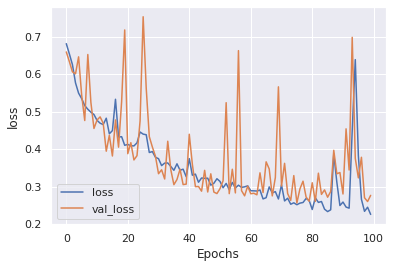

In [ ]:
# build the model
model,history2 = build_model_using_inception(images, y)
plot_history(history2, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(images_test, y_test)

print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.88379204


D. (25 marks) Experiment with number of layers, filter size, stride etc. and neurons per layer to increase the performance metrics. Apply other tweaks and tuning to improve accuracy. You must report the results for at least 2 different designs.

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=7,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# Creating model using the Sequential in tensorflow
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
# from keras.utils.vutils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

def build_model_using_inception(x_train_scaled,y_train):
  learning_rate = 0.01
  epp = 50
  batch_s = 100

  # define model input
  visible = Input(shape=(11, 11, 128))
  # add inception module
  layer = naive_inception_module(visible, 64, 128, 32)
  # model2 = Model(visible, outputs=layer)

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    Model(visible, outputs=layer),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.1),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  
  model.compile(optimizer=adam_custom,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s
                      # callbacks=[callback]
                      )
  
  return model,history


Train on 29740 samples, validate on 7436 samples
Epoch 1/50
29740/29740 [==============================] - 6s 218us/sample - loss: 0.5430 - acc: 0.7252 - val_loss: 0.4958 - val_acc: 0.7657
Epoch 2/50
29740/29740 [==============================] - 5s 167us/sample - loss: 0.4691 - acc: 0.7804 - val_loss: 0.4305 - val_acc: 0.8034
Epoch 3/50
29740/29740 [==============================] - 5s 167us/sample - loss: 0.4129 - acc: 0.8123 - val_loss: 0.4075 - val_acc: 0.8034
Epoch 4/50
29740/29740 [==============================] - 5s 167us/sample - loss: 0.3718 - acc: 0.8375 - val_loss: 0.3502 - val_acc: 0.8466
Epoch 5/50
29740/29740 [==============================] - 5s 168us/sample - loss: 0.3399 - acc: 0.8538 - val_loss: 0.3595 - val_acc: 0.8483
Epoch 6/50
29740/29740 [==============================] - 5s 169us/sample - loss: 0.3270 - acc: 0.8622 - val_loss: 0.3219 - val_acc: 0.8624
Epoch 7/50
29740/29740 [==============================] - 5s 169us/sample - loss: 0.3107 - acc: 0.8672 - val_lo

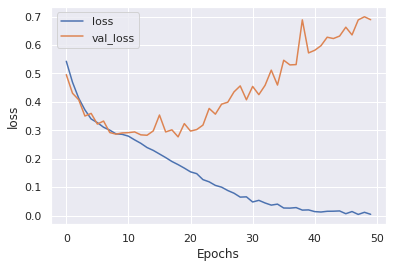

In [ ]:
# build the model

model,history = build_model_using_inception(images, y)
plot_history(history, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.8693753


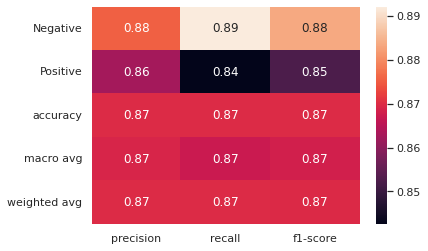

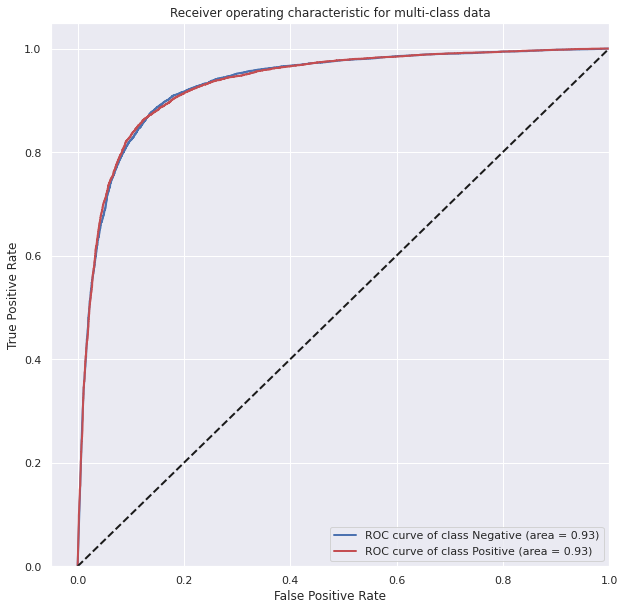

In [ ]:
auc_roc(model)

layer
64,8 - 87.68
32,8 - 85.55
64,32,8 - 87
dr 0.1 - 86
dr 0.2 - 86.7

In [ ]:
# Creating model using the Sequential in tensorflow
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
# from keras.utils.vutils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

def build_model_using_inception(x_train_scaled,y_train):
  learning_rate = 0.025
  epp = 30
  batch_s = 100

  # define model input
  visible = Input(shape=(11, 11, 128))
  # add inception module
  layer = naive_inception_module(visible, 64, 128, 32)
  # model2 = Model(visible, outputs=layer)

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (3,3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=2, padding='valid'),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=2, padding='valid'),
    Model(visible, outputs=layer),
    keras.layers.Flatten(),
    keras.layers.Dense(16, activation='relu'),
    Dropout(0.2),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s
                      # callbacks=[callback]
                      )
  
  return model,history


Train on 29740 samples, validate on 7436 samples
Epoch 1/30
29740/29740 [==============================] - 5s 181us/sample - loss: 0.6140 - acc: 0.6671 - val_loss: 0.5351 - val_acc: 0.7337
Epoch 2/30
29740/29740 [==============================] - 5s 160us/sample - loss: 0.5186 - acc: 0.7457 - val_loss: 0.4575 - val_acc: 0.7855
Epoch 3/30
29740/29740 [==============================] - 5s 158us/sample - loss: 0.4797 - acc: 0.7734 - val_loss: 0.4083 - val_acc: 0.8116
Epoch 4/30
29740/29740 [==============================] - 5s 158us/sample - loss: 0.4960 - acc: 0.7684 - val_loss: 0.4503 - val_acc: 0.7846
Epoch 5/30
29740/29740 [==============================] - 5s 158us/sample - loss: 0.4165 - acc: 0.8103 - val_loss: 0.3643 - val_acc: 0.8334
Epoch 6/30
29740/29740 [==============================] - 5s 158us/sample - loss: 0.3861 - acc: 0.8253 - val_loss: 0.3281 - val_acc: 0.8596
Epoch 7/30
29740/29740 [==============================] - 5s 157us/sample - loss: 0.3715 - acc: 0.8299 - val_lo

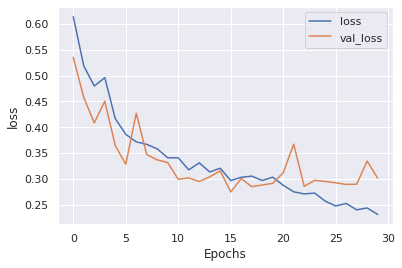

In [ ]:
# build the model

model,history = build_model_using_inception(images, y)
plot_history(history, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.88379204


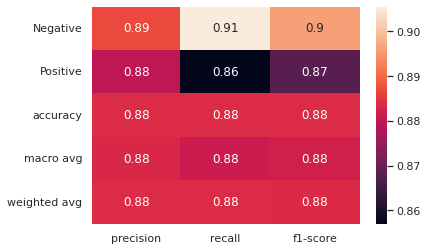

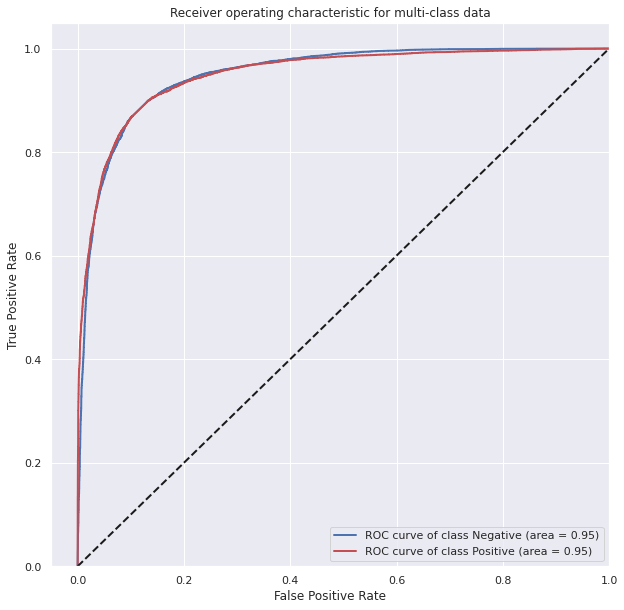

In [ ]:
auc_roc(model)

Batch normalization

In [ ]:
# Creating model using the Sequential in tensorflow
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
# from keras.utils.vutils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

def build_model_using_inception2(x_train_scaled,y_train):
  learning_rate = 0.001
  epp = 60
  batch_s = 100

  # define model input
  visible = Input(shape=(12, 12, 128))
  # add inception module
  layer = naive_inception_module(visible, 64, 128, 32)
  # model2 = Model(visible, outputs=layer)

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (4,4), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid'),
    layers.Conv2D(128, (4,4), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),
    Model(visible, outputs=layer),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.BatchNormalization(),
    keras.layers.Dense(8, activation='relu'),
    Dropout(0.2),
    layers.BatchNormalization(),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  
  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s,
                      callbacks=[callback]
                      )
  
  return model,history


Train on 29740 samples, validate on 7436 samples
Epoch 1/60
29740/29740 [==============================] - 7s 249us/sample - loss: 0.6310 - acc: 0.6535 - val_loss: 0.5877 - val_acc: 0.6930
Epoch 2/60
29740/29740 [==============================] - 6s 204us/sample - loss: 0.4762 - acc: 0.7843 - val_loss: 0.4427 - val_acc: 0.8042
Epoch 3/60
29740/29740 [==============================] - 6s 203us/sample - loss: 0.4145 - acc: 0.8193 - val_loss: 1.1970 - val_acc: 0.5896
Epoch 4/60
29740/29740 [==============================] - 6s 204us/sample - loss: 0.4008 - acc: 0.8301 - val_loss: 0.3562 - val_acc: 0.8484
Epoch 5/60
29740/29740 [==============================] - 6s 204us/sample - loss: 0.3851 - acc: 0.8355 - val_loss: 0.3677 - val_acc: 0.8452
Epoch 6/60
29740/29740 [==============================] - 6s 203us/sample - loss: 0.3755 - acc: 0.8397 - val_loss: 0.6898 - val_acc: 0.6579
Epoch 7/60
29740/29740 [==============================] - 6s 201us/sample - loss: 0.3646 - acc: 0.8459 - val_lo

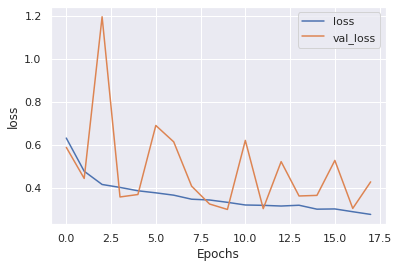

In [ ]:
# build the model

model,history = build_model_using_inception2(images, y)
plot_history(history, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.82634336


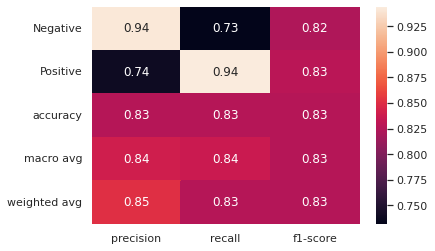

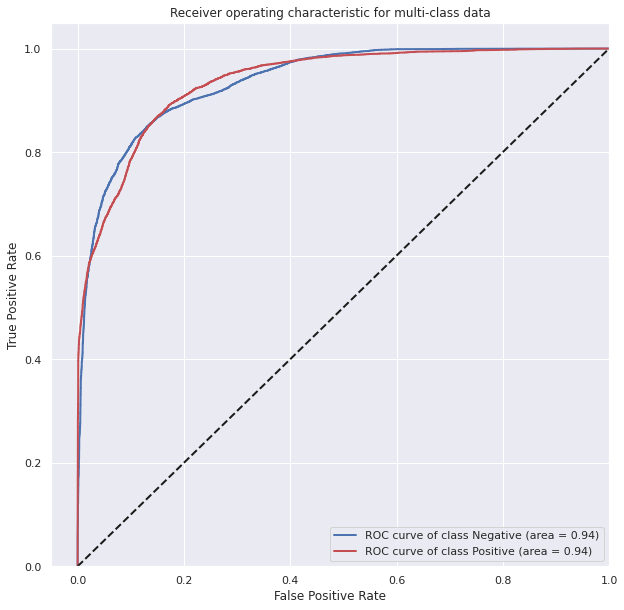

In [ ]:
auc_roc(model)

Scheduled lr

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0005,
    patience=7,
    verbose=0,
    mode='min',
    baseline=None,
    restore_best_weights=False
)

In [ ]:
# Creating model using the Sequential in tensorflow
# example of creating a CNN with an efficient inception module
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import concatenate
# from keras.utils.vutils import plot_model

def naive_inception_module(layer_in, f1, f2, f3):
	# 1x1 conv
	conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
	# 3x3 conv
	conv3 = Conv2D(f2, (3,3), padding='same', activation='relu')(layer_in)
	# 5x5 conv
	conv5 = Conv2D(f3, (5,5), padding='same', activation='relu')(layer_in)
	# 3x3 max pooling
	pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
	# concatenate filters, assumes filters/channels last
	layer_out = concatenate([conv1, conv3, conv5, pool], axis=-1)
	return layer_out

def build_model_using_inception2(x_train_scaled,y_train):
  learning_rate = 0.00001
  epp = 15
  batch_s = 100

  # define model input
  visible = Input(shape=(5, 5, 128))
  # add inception module
  layer = naive_inception_module(visible, 64, 128, 32)
  # model2 = Model(visible, outputs=layer)

  model = keras.Sequential([
    # layers.Rescaling(1./255),
    layers.Conv2D(16, (4,4), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(3,3), strides=3, padding='valid'),
    layers.Conv2D(128, (4,4), padding='same', activation='relu'),
    layers.MaxPooling2D(pool_size=(3,3), strides=3, padding='valid'),
    Model(visible, outputs=layer),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    Dropout(0.15),
    layers.BatchNormalization(),
    keras.layers.Dense(8, activation='relu'),
    Dropout(0.15),
    layers.BatchNormalization(),
    keras.layers.Dense(2, activation=tf.nn.softmax)
  ])
  
  # Compile the Model
  decay_rate = learning_rate / epp
  momentum = 1
  model.compile(optimizer=SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  # Model Training

  # train the model
  history = model.fit(x_train_scaled,
                      y_train, 
                      epochs=epp, 
                      validation_split=0.2,
                      batch_size=batch_s,
                      callbacks=[callback]
                      )
  
  return model,history


Train on 29740 samples, validate on 7436 samples
Epoch 1/15
29740/29740 [==============================] - 5s 160us/sample - loss: 0.9032 - acc: 0.5588 - val_loss: 0.7547 - val_acc: 0.5799
Epoch 2/15
29740/29740 [==============================] - 4s 119us/sample - loss: 0.6891 - acc: 0.6314 - val_loss: 0.5646 - val_acc: 0.7246
Epoch 3/15
29740/29740 [==============================] - 4s 119us/sample - loss: 0.6213 - acc: 0.6707 - val_loss: 0.5773 - val_acc: 0.7162
Epoch 4/15
29740/29740 [==============================] - 4s 119us/sample - loss: 0.6230 - acc: 0.6694 - val_loss: 0.5925 - val_acc: 0.7231
Epoch 5/15
29740/29740 [==============================] - 4s 119us/sample - loss: 0.6332 - acc: 0.6495 - val_loss: 0.6293 - val_acc: 0.6787
Epoch 6/15
29740/29740 [==============================] - 4s 118us/sample - loss: 0.6180 - acc: 0.6671 - val_loss: 0.6218 - val_acc: 0.6590
Epoch 7/15
29740/29740 [==============================] - 4s 119us/sample - loss: 0.5975 - acc: 0.6841 - val_lo

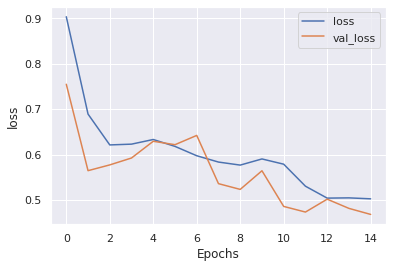

In [ ]:
# build the model

model,history = build_model_using_inception2(images, y)
plot_history(history, 'loss')

In [ ]:
test_loss, test_acc = model.evaluate(images_test, y_test)
print('Test dataset accuracy is:', test_acc)

Test accuracy: 0.8000764


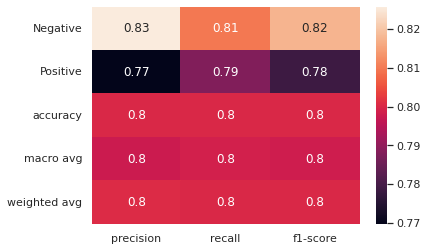

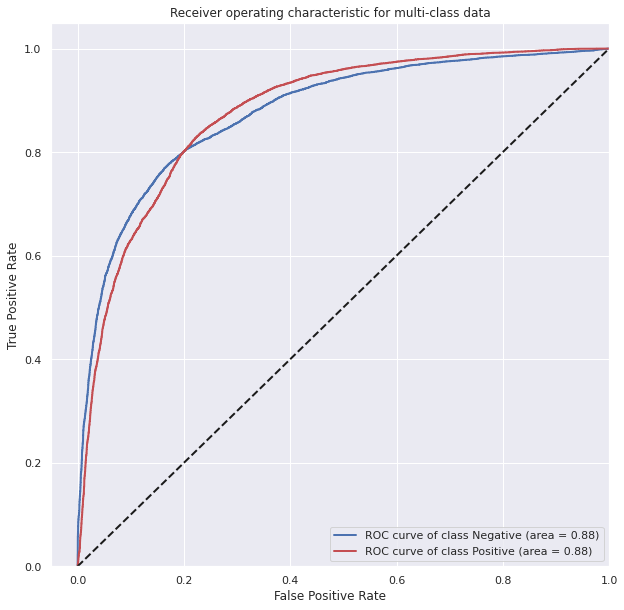

In [ ]:
auc_roc(model)

Thus from this assignment we can get 88 percent of maximum of accuracy for the test dataset. 